<a href="https://colab.research.google.com/github/abshilpa/Image-segmentation/blob/main/Assignment_1_Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installation of KerasCV.
!pip install -q --upgrade keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 25.1 MB/s eta 0:00:00


In [3]:
# Importing relevant modules.

import random
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO  # API for COCO dataset.
import skimage.io as io

%matplotlib inline

In [4]:
# Import and mount Google Drive.

from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Unzip the dataset file and store it in a folder called images.

!unzip "/content/RM_Segmentation_Assignment_dataset (1).zip" -d "/content/drive/MyDrive/coco2017/"

Archive:  /content/RM_Segmentation_Assignment_dataset (1).zip
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001751.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001380.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001643.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001583.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001685.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001482.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001494.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001551.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001654.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001594.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001411.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001459.jpg  
  inflating: /content/drive/MyDrive/coco2017/test-30/000000001410.jpg  
  

In [8]:
# Define location of training data (images and labels).

train_data_path = "/content/drive/MyDrive/coco2017/train-300"
train_annotation_file = f"{train_data_path}/labels.json"

In [9]:
# Initialising COCO API for instance annotations.

coco = COCO(train_annotation_file)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [10]:
# Extract and display COCO categories and supercategories for the training dataset.

category_IDs = coco.getCatIds()
categories = coco.loadCats(category_IDs)

print(categories)

names_cats = [cats["name"] for cats in categories]
print(len(names_cats), "COCO categories:", " ".join(names_cats))

names_scats = set([cats["supercategory"] for cats in categories])
print(len(names_scats), "COCO supercategories:", " ".join(names_scats))

[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}, {'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}, {'id': 2, 'name': 'banana', 'supercategory': 'food'}, {'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}, {'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}, {'id': 5, 'name': 'bear', 'supercategory': 'animal'}, {'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}, {'id': 8, 'name': 'bird', 'supercategory': 'animal'}, {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}, {'id': 10, 'name': 'book', 'supercategory': 'indoor'}, {'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}, {'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}, {'id': 13, 'name': 'broccoli', 'supercategory': 'food'}, {'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}, {'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 17, 'name': 'carrot', 'sup

In [11]:
# Define function to extract category name from ID.

def get_category_name(class_ID, categories):
    for i in range(len(categories)):
        if categories[i]["id"] == class_ID:
            return categories[i]["name"]
    return "None"

In [12]:
# Look at one example.

category_name_10 = get_category_name(10, categories)
print(f"The category name is {category_name_10}.")

# Make sure to check out some others.

The category name is book.


In [13]:
# Get all training images containing a given object category or categories.
# Remember, for this assignment we will focus on the classes "person", "cake", "dog", "cat"!

filter_class = ["cat"]
category_IDs = coco.getCatIds(catNms=filter_class)
image_IDs = coco.getImgIds(catIds=category_IDs)

print(f"Number of images containing specified category(ies): {len(image_IDs)}.")
print(f"IDs of images containing specified category(ies): {image_IDs}.")

# What happens when you are filtering for a different category or multiple classes?

Number of images containing specified category(ies): 4.
IDs of images containing specified category(ies): [299, 132, 268, 294].


{'id': 299, 'file_name': '000000003935.jpg', 'height': 554, 'width': 640, 'license': None, 'coco_url': None}


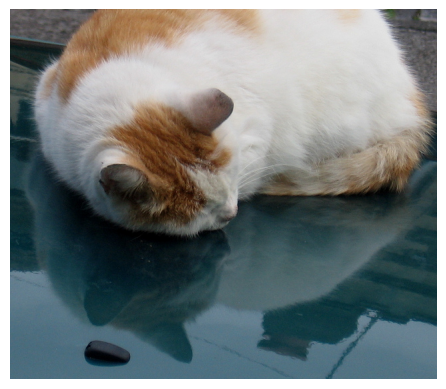

In [14]:
# Load and display one of the example images.

example_image = coco.loadImgs(image_IDs[0])[0]
print(example_image)

image = io.imread(f'{train_data_path}/data/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

plt.show()

In [15]:
# Get COCO annotation IDs and content of annotations, i.e., bounding boxes and segmentation masks.

test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)

test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

# Make sure you understand the content of the annotations.

[3840]
[{'id': 3840, 'image_id': 299, 'category_id': 18, 'bbox': [33.36, 0.83, 602.85, 338.35], 'segmentation': [[266.0, 338.5, 225.0, 337.5, 158.0, 319.5, 156.0, 313.5, 139.0, 308.5, 121.0, 296.5, 111.0, 276.5, 66.5, 247.0, 51.5, 220.0, 47.5, 182.0, 32.5, 148.0, 44.5, 96.0, 67.0, 75.5, 72.5, 87.0, 88.5, 43.0, 139.0, 0, 554.0, 1.5, 601.5, 116.0, 635.5, 163.0, 611.5, 217.0, 589.5, 250.0, 554.0, 264.5, 466.0, 277.5, 346.0, 280.5, 335.5, 284.0, 346.0, 303.5, 331.0, 309.5, 316.0, 324.5, 287.0, 328.5, 266.0, 338.5]], 'area': 203974.29750000002, 'iscrowd': 0, 'supercategory': 'animal'}]


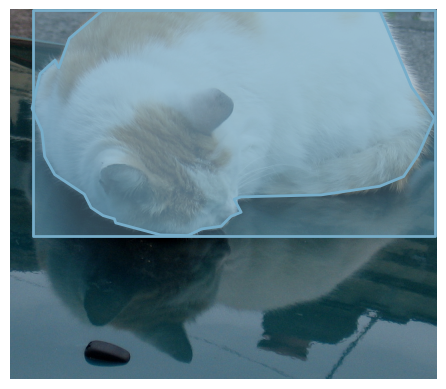

In [16]:
# Load and display test image with instance annotations.

plt.imshow(image)
plt.axis("off")

coco.showAnns(test_image_annotations, draw_bbox=True)

# Try to remove the bounding box from the image and show the segmentation ground truth only.

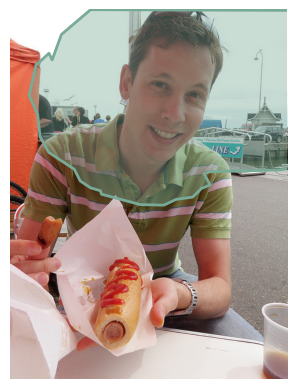

In [25]:
# Load and display test image with segmentation ground truth only (no bounding boxes).

plt.imshow(image)
plt.axis("off")

# Show annotations without bounding boxes
coco.showAnns(test_image_annotations, draw_bbox=False)

plt.show()


In [17]:
# Extract the training images that contain any combination of the four target classes.

target_classes = ["cake", "cat", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
training_images = []

# Iterate over each individual class in the list.
for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    training_images += coco.loadImgs(training_images_IDs)

print(
    f"Number of images with target classes including repetitions: {len(training_images)}."
)

cake
cat
dog
person
Number of images with target classes including repetitions: 287.


In [18]:
# Filter out repeated images.

unique_training_images = []

for i in range(len(training_images)):
    if training_images[i] not in unique_training_images:
        unique_training_images.append(training_images[i])

# Shuffle the training data.
random.seed(0)
random.shuffle(unique_training_images)

print(
    f"Number of unique images in training data containing the target classes: {len(unique_training_images)}"
)

# Do you understand why the numbers are different?

Number of unique images in training data containing the target classes: 276


{'id': 244, 'file_name': '000000016403.jpg', 'height': 640, 'width': 480, 'license': None, 'coco_url': None}


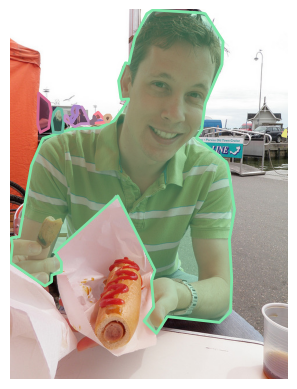

In [19]:
# Load and display example training image with segmentation masks.

training_image = unique_training_images[10]
print(training_image)

image = io.imread(f'{train_data_path}/data/{training_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

training_image_annotations_ID = coco.getAnnIds(
    imgIds=training_image["id"], catIds=target_classes_IDs, iscrowd=None
)
training_image_annotations = coco.loadAnns(training_image_annotations_ID)
coco.showAnns(training_image_annotations, draw_bbox=False)

plt.show()

In [20]:
# To generate segmentation mask use annToMask function and extract the info stored in the annotations.
# For example, for the first object in our example training image:

mask_example = coco.annToMask(training_image_annotations[0])

print(type(mask_example))
print(mask_example)
print(mask_example.shape)
print(np.max(mask_example))
print(np.min(mask_example))

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(640, 480)
1
0


Unique pixel values in the mask: [0. 3.]


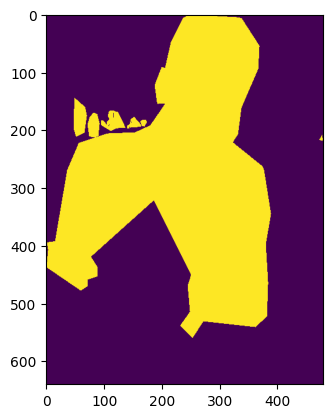

In [21]:
# Plotting the segmentation masks with different colours.
# There are many ways to do this. This is just one example.

mask = np.zeros((training_image["height"], training_image["width"]))

for i in range(len(training_image_annotations)):
    # Get object category name.
    object_category = get_category_name(
        training_image_annotations[i]["category_id"], categories
    )
    # Assign pixel value based on location in target_classes list.
    pixel_value = target_classes.index(object_category) + 1
    # Assign pixel value to mask based on annToMask output.
    mask = np.maximum(coco.annToMask(training_image_annotations[i]) * 3, mask)

print(f"Unique pixel values in the mask: {np.unique(mask)}")

plt.imshow(mask)
plt.show()

# Do you understand the output of the print statement?
# Why did we have to add a + 1 in the defintion of the pixel_value?

In [ ]:
# Some more hints and questions to think about:

# Use the above code to start with your EDA to answer questions such as the following ones:
# How many images are in the downloaded data folders?
# How many images are in our training/validation/test datasets?
# How often does each COCO/target class appear?
# How large are the images? What is their distribution?
# How many segmentation ground truths are given? How are these encoded?

# You can (but don't have to) use the above code as a starting point to create your training and validation data for your ML model.
# Do you then want to use a transfer learning approach or develop your own ML model using, e.g., Keras?
# Think about whether your training data should be augmented. If so, how could you augment your data and what effect will that have on performance?
# How can you evaluate your model performance given the segmentation ground truths?
# Which of the test samples are suitable for a performance analysis of your model?
# How is the performance affected by our choice of 4 target classes?

# THESE ARE JUST SOME EXAMPLE QUESTIONS AND DO NOT PROVIDE A COMPULSORY OR COMPLETE LIST OF THINGS TO ADDRESS IN YOUR ASSIGNMENT.

In [22]:
# Load annotation IDs for a specific image and category
test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)


In [23]:
all_img_ids = coco.getImgIds()
print(f"Total number of images: {len(all_img_ids)}")


Total number of images: 300


In [24]:
from sklearn.model_selection import train_test_split
train_set, val_set = train_test_split(unique_training_images, test_size=0.2, random_state=42)
